# Deskritisasi (Tugas 2)

## Apa itu Deskritisasi
<p align="justify">
Deskritisasi merupakan transformasi kolom menjadi type data lain. Tujuannya untuk membuat data menjadi lebih optimal yang nantinya memudahkan untuk dianalisis.
</p>

## Proses Diskritisasi Data
<p align="justify">
Proses diskritisasi data yaitu proses perubahan data dari data yang berbentuk numerik menjadi data yang berbentuk kategorik. Tugas diskritisasi yaitu membagi rentang nilai X menjadi k interval yang berurutan disebut juga bins.
</p>

### Equal Width Binning 
<p align="justify">
Pendekatan binning yang paling sederhana yaitu membagi rentang X menjadi k interval yang sama lebar. Lebar interval yaitu rentang X dibagi dengan k

$$
\begin{align*}
\displaystyle \text{w} &= \frac{x_{max}-x_{min}}{k}
\end{align*}
$$

Batas interval ke-i diberikan sebagai berikut:

$$
\begin{align*}
\displaystyle v_{i} &= x_{min} + iw \\
i &= 1,2,3, ... k-1 
\end{align*}
$$

#### Contoh:
```
Input: [5, 10, 11, 13, 15, 35, 50, 55, 72, 92, 204, 215]

Output:
[5, 10, 11, 13, 15, 35, 50, 55, 72]
[92]
[204, 215]

```
</p>

### Equal Frequency Binning
<p align="justify">
Equal Frequency Binning merupakan bind atau k yang memiliki frekuensi yang sama

#### Contoh:
```
Input:[5, 10, 11, 13, 15, 35, 50, 55, 72, 92, 204, 215] 

Output:
[5, 10, 11, 13]
[15, 35, 50, 55]
[72, 92, 204, 215]

```
</p>

### Entropy
<p align="justify">
Entropi merupakan distribusi probabilitas dalam teori informasi dan diadopsi kedalam Algoritme C4.5 untuk mengukur tingkat homogenitas distribusi kelas dari sebuah himpunan data (dataset). Sebagai ilustrasi, semakin tinggi tingkat entropi dari sebuah dataset maka semakin homogen distribusi kelas pada dataset tersebut. Persamaan untuk menghitung entropi pada pohon keputusan C4.5 ditunjukan pada Persamaan 1 (Raditya, 2009):
</p>

$$
\begin{align*}
\displaystyle Entropy(S) &= \sum_{i=0}^{k} -phi \ log_{2} \ phi \\
Keterangan &: \\
S &= Himpunan \ dataset  \\
k &= Banyaknya \ partisi \ S \\
phi &= Proporsi \ S_{i} \ terhadap \ S
\end{align*}
$$


### Gain
<p align="justify">
Setelah membagi dataset berdasarkan sebuah atribut kedalam subset yang lebih kecil, entropi dari data tersebut akan berubah. Perubahan entropi ini dapat digunakan untuk menentukan bagus tidaknya pembagian data yang telah dilakukan. Perubahan entropi ini disebut dengan information gain dalam Algoritme C4.5. Information gain ini diukur dengan menghitung selisih antara entropi dataset sebelum dan sesudah pembagian (splitting) dilakukan. Pembagian yang terbaik
akan menghasilkan entropi subset yang paling kecil, dengan demikian berdampak pada information gain yang terbesar. Persamaan untuk menghitung nilai Gain pada pohon keputusan ditujukan pada Persamaan 2 (Raditya, 2009):
</p>

$$
\begin{align*}
\displaystyle 𝐺𝑎𝑖𝑛(𝐴) &= 𝐸𝑛𝑡𝑟𝑜𝑝𝑖(𝑆) − \sum_{i=1}^{k}\frac{\left| S \right|}{\left| S_{i} \right|} * 𝐸𝑛𝑡𝑟𝑜𝑝𝑖(𝑆_{i}) \\
Keterangan &: \\
𝑆 &: himpunan \ kasus \\
𝐴 &: atribut \\
k &: jumlah \ partisi \ atribut \ A \\
|𝑆𝑖| &: jumlah \ kasus \ pada \ partisi \ ke-i \\
|𝑆| &: jumlah \ kasus \ dalam \ S 
\end{align*}
$$



## Mencari Data Kategorikal 

1.   Lakukan proses diskritisasi dengan equal width dan equal frequency
2.   Lakukan proses diskritisasi dengan basis entropy

Persiapan

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
import numpy as np
from math import log2

## Data 

In [5]:
data2 ='https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'

In [6]:
df2 = pd.read_csv(data2)
Qcutdf2 = pd.read_csv(data2)

In [7]:
df2

sepal.length  sepal.width  petal.length  petal.width    variety
0             5.1          3.5           1.4          0.2     Setosa
1             4.9          3.0           1.4          0.2     Setosa
2             4.7          3.2           1.3          0.2     Setosa
3             4.6          3.1           1.5          0.2     Setosa
4             5.0          3.6           1.4          0.2     Setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  Virginica
146           6.3          2.5           5.0          1.9  Virginica
147           6.5          3.0           5.2          2.0  Virginica
148           6.2          3.4           5.4          2.3  Virginica
149           5.9          3.0           5.1          1.8  Virginica

[150 rows x 5 columns]

In [8]:
SepalLength = df2['sepal.length']
SepalWidth = df2['sepal.width']
PetalLength = df2['petal.length']
PetalWith = df2['petal.width']

In [9]:
labels = ['sempit', 'sedang', 'lebar']

## 1. Lakukan proses diskritisasi dengan equal width dan equal frequency

### Diskritisasi adalah proses kuantisasi sifat-sifat kontinu. Salah satu metode yang dapat memperkirakan bentuk diferensial kontinu menjadi bentuk diskrit ialah metode beda hingga. Sehingga dalam penelitian ini akan dilakukan proses diskritisasi pada model pembentukan sel.


### Min, Max

In [10]:
SepalLength

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal.length, Length: 150, dtype: float64

In [11]:
SepalWidth

0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal.width, Length: 150, dtype: float64

In [12]:
PetalLength

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal.length, Length: 150, dtype: float64

In [13]:
labels = ['sempit', 'sedang', 'lebar']
# LabelledBinning1 = pd.qcut(df2['petal.length'],len(labels1), True, labels1).value_counts()

In [14]:
MinMaxSepalLength = [np.min(df2['sepal.length']),np.max(df2['sepal.length'])]
MinMaxSepalWidth = [np.min(df2['sepal.width']),np.max(df2['sepal.width'])]
MinMaxPetalLength = [np.min(df2['petal.length']),np.max(df2['petal.length'])]
MinMaxPetalWith = [np.min(df2['petal.width']),np.max(df2['petal.width'])]

In [15]:
PetalWith

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal.width, Length: 150, dtype: float64

### Equal Width 

equal width dapat dicari menggunakan library pthon menggunakan metopde cut

In [16]:
df2['S-sepal.length'] = pd.cut(df2['sepal.length'], 3, labels=labels)
df2['S-sepal.width'] = pd.cut(df2['sepal.width'], 3, labels=labels)
df2['S-petal.length'] = pd.cut(df2['petal.length'], 3, labels=labels)
df2['S-petal.width'] = pd.cut(df2['petal.width'], 3, labels=labels)
df2

sepal.length  sepal.width  petal.length  petal.width    variety  \
0             5.1          3.5           1.4          0.2     Setosa   
1             4.9          3.0           1.4          0.2     Setosa   
2             4.7          3.2           1.3          0.2     Setosa   
3             4.6          3.1           1.5          0.2     Setosa   
4             5.0          3.6           1.4          0.2     Setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  Virginica   
146           6.3          2.5           5.0          1.9  Virginica   
147           6.5          3.0           5.2          2.0  Virginica   
148           6.2          3.4           5.4          2.3  Virginica   
149           5.9          3.0           5.1          1.8  Virginica   

    S-sepal.length S-sepal.width S-petal.length S-petal.width  
0           sempit        sedang         sempit        sempit  
1           sempit        sedang         sempit        sempit  
2           sempit        sedang         sempit        sempit  
3           sempit        sedang         sempit        sempit  
4           sempit        sedang         sempit        sempit  
..             ...           ...            ...           ...  
145         sedang        sedang          lebar         lebar  
146         sedang        sempit          lebar         lebar  
147         sedang        sedang          lebar         lebar  
148         sedang        sedang          lebar         lebar  
149         sedang        sedang          lebar         lebar  

[150 rows x 9 columns]

#### Data Sepal Length

In [17]:
Sepal_Length_Binning = pd.cut(df2['sepal.length'],len(labels), True, labels)
Labelled_Sepal_Length_Binning = Sepal_Length_Binning.value_counts()
NoLabelled_Sepal_Length_Binning = pd.cut(df2['sepal.length'],len(labels)).value_counts()
# IntervalBinning = pd.cut()

In [18]:
Labelled_Sepal_Length_Binning

sedang    71
sempit    59
lebar     20
Name: sepal.length, dtype: int64

In [19]:
pd.concat((df2['sepal.length'],Sepal_Length_Binning),axis=1).head(15)

sepal.length sepal.length
0           5.1       sempit
1           4.9       sempit
2           4.7       sempit
3           4.6       sempit
4           5.0       sempit
5           5.4       sempit
6           4.6       sempit
7           5.0       sempit
8           4.4       sempit
9           4.9       sempit
10          5.4       sempit
11          4.8       sempit
12          4.8       sempit
13          4.3       sempit
14          5.8       sedang

#### Data Sepal Width

In [20]:
Sepal_Width_Binning = pd.cut(df2['sepal.width'],len(labels), True, labels)
Labelled_Sepal_Width_Binning = Sepal_Width_Binning.value_counts()
NoLabelled_Sepal_Width_Binning = pd.cut(df2['sepal.width'],len(labels)).value_counts()
# IntervalBinning = pd.cut()

In [21]:
Labelled_Sepal_Width_Binning

sedang    88
sempit    47
lebar     15
Name: sepal.width, dtype: int64

In [22]:
NoLabelled_Sepal_Width_Binning

(2.8, 3.6]      88
(1.998, 2.8]    47
(3.6, 4.4]      15
Name: sepal.width, dtype: int64

In [23]:
pd.concat((df2['sepal.width'],Sepal_Width_Binning),axis=1).head(15)

sepal.width sepal.width
0          3.5      sedang
1          3.0      sedang
2          3.2      sedang
3          3.1      sedang
4          3.6      sedang
5          3.9       lebar
6          3.4      sedang
7          3.4      sedang
8          2.9      sedang
9          3.1      sedang
10         3.7       lebar
11         3.4      sedang
12         3.0      sedang
13         3.0      sedang
14         4.0       lebar

#### Data Petal Length

In [24]:
Petal_Length_Binning = pd.cut(df2['petal.length'],len(labels), True, labels)
Labelled_Petal_Length_Binning = Petal_Length_Binning.value_counts()
NoLabelled_Petal_Length_Binning = pd.cut(df2['petal.length'],len(labels)).value_counts()
# IntervalBinning = pd.cut()

In [25]:
Labelled_Petal_Length_Binning

sedang    54
sempit    50
lebar     46
Name: petal.length, dtype: int64

In [26]:
pd.concat((df2['petal.length'],Petal_Length_Binning),axis=1)

petal.length petal.length
0            1.4       sempit
1            1.4       sempit
2            1.3       sempit
3            1.5       sempit
4            1.4       sempit
..           ...          ...
145          5.2        lebar
146          5.0        lebar
147          5.2        lebar
148          5.4        lebar
149          5.1        lebar

[150 rows x 2 columns]

#### Petal Width

In [27]:
Petal_Width_Binning = pd.cut(df2['petal.width'],len(labels), True, labels)
Labelled_Petal_Width_Binning = Petal_Width_Binning.value_counts()
NoLabelled_Petal_Width_Binning = pd.cut(df2['petal.width'],len(labels)).value_counts()
# IntervalBinning = pd.cut()

In [28]:
Labelled_Petal_Width_Binning

sedang    54
sempit    50
lebar     46
Name: petal.width, dtype: int64

In [29]:
pd.concat((df2['petal.width'],Petal_Width_Binning),axis=1)

petal.width petal.width
0           0.2      sempit
1           0.2      sempit
2           0.2      sempit
3           0.2      sempit
4           0.2      sempit
..          ...         ...
145         2.3       lebar
146         1.9       lebar
147         2.0       lebar
148         2.3       lebar
149         1.8       lebar

[150 rows x 2 columns]

### Equal Frequency

Equal Frequency dapat dikerjakan menggunakan pandas dengan m,emanggil fungsi qcut

In [30]:
Qcutdf2['S-sepal.length'] = pd.qcut(df2['sepal.length'], len(labels), labels=labels)
Qcutdf2['S-sepal.width'] = pd.qcut(df2['sepal.width'], len(labels), labels=labels)
Qcutdf2['S-petal.length'] = pd.qcut(df2['petal.length'], len(labels), labels=labels)
Qcutdf2['S-petal.width'] = pd.qcut(df2['petal.width'], len(labels), labels=labels)
Qcutdf2

sepal.length  sepal.width  petal.length  petal.width    variety  \
0             5.1          3.5           1.4          0.2     Setosa   
1             4.9          3.0           1.4          0.2     Setosa   
2             4.7          3.2           1.3          0.2     Setosa   
3             4.6          3.1           1.5          0.2     Setosa   
4             5.0          3.6           1.4          0.2     Setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  Virginica   
146           6.3          2.5           5.0          1.9  Virginica   
147           6.5          3.0           5.2          2.0  Virginica   
148           6.2          3.4           5.4          2.3  Virginica   
149           5.9          3.0           5.1          1.8  Virginica   

    S-sepal.length S-sepal.width S-petal.length S-petal.width  
0           sempit         lebar         sempit        sempit  
1           sempit        sedang         sempit        sempit  
2           sempit        sedang         sempit        sempit  
3           sempit        sedang         sempit        sempit  
4           sempit         lebar         sempit        sempit  
..             ...           ...            ...           ...  
145          lebar        sedang          lebar         lebar  
146         sedang        sempit          lebar         lebar  
147          lebar        sedang          lebar         lebar  
148         sedang         lebar          lebar         lebar  
149         sedang        sedang          lebar         lebar  

[150 rows x 9 columns]

## 2. Lakukan proses diskritisasi dengan basis entropy
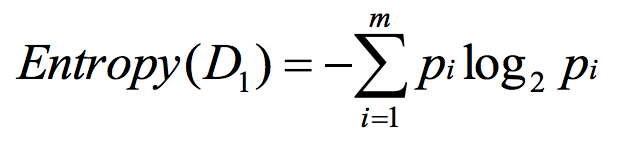

menyiapkan data yang akan dicari entropynya

In [31]:
data = df2[['sepal.length','S-sepal.length']]
data

sepal.length S-sepal.length
0             5.1         sempit
1             4.9         sempit
2             4.7         sempit
3             4.6         sempit
4             5.0         sempit
..            ...            ...
145           6.7         sedang
146           6.3         sedang
147           6.5         sedang
148           6.2         sedang
149           5.9         sedang

[150 rows x 2 columns]

fungsi yang digunakan untuk menghitung banyaknya data berdasarkan kategori

In [32]:
def SortCategory(data, labels, col, category):
  group = data.groupby(category).count()
  return [group.loc[label, col] for label in labels]

fungsi yang digunakan untuk proses info D

In [33]:
def split(nilai, data, labels, col, category):
  less_group = data[data[col] < nilai]
  greater_group = data[data[col] >= nilai]

  length_less_group = SortCategory(less_group, labels, col, category)
  length_greater_group = SortCategory(greater_group, labels, col, category)

  return (length_less_group, length_greater_group)

fungsi untuk menghitung nilai entropy

In [34]:
def entropy(d):
  return -(sum([i/sum(d) * log2(i/sum(d)) if i/sum(d) != 0 else 0 for i in d]))

fungsi untuk menghitung nilai info

In [35]:
def info(d, data):
  return sum([(sum(i) / data.shape[0]) * entropy(i) for i in d])

fungsi untuk menghitung nilai gain

In [37]:
def gain(inisial, new):
  return inisial - new

Menghitung nilai entropy overall

In [38]:
d = SortCategory(data, labels, 'sepal.length', 'S-sepal.length')
Einisial = entropy(d)
Einisial

1.4278417085296922

Untuk mencari split 4.5

In [39]:
az = split(4.5, data, labels, 'sepal.length', 'S-sepal.length')
Enew1 = info(az, data)
gain(Einisial, Enew1)

0.03671508206271512

Untuk mencari split 5.5

In [40]:
az = split(5.5, data, labels, 'sepal.length', 'S-sepal.length')
Enew2 = info(az, data)
gain(Einisial, Enew2)

0.7243785559543089

Untuk mencari split 6.5

In [41]:
az = split(6.5, data, labels, 'sepal.length', 'S-sepal.length')
Enew3 = info(az, data)
gain(Einisial, Enew3)
az = split(6.5, data, labels, 'sepal.length', 'S-sepal.length')
Enew3 = info(az, data)
gain(Einisial, Enew3)

0.43166487471484216